# 0.0 Imports

In [60]:
import numpy          as np
import pandas         as pd
import seaborn        as sns
import plotly.express as px

from matplotlib           import pyplot    as plt
from matplotlib           import gridspec
from IPython.display      import display
from IPython.core.display import HTML

warnings.filterwarnings( 'ignore' )
pd.set_option('display.float_format', lambda x: '%.2f' % x)

NameError: name 'warnings' is not defined

## 0.1 Load Data

In [ ]:
data = pd.read_csv('../Datasets/kc_house_data.csv')

## 0.2 Auxiliar Functions

In [61]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()

In [62]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


# 1.0 Data Description

In [4]:
display(data)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## 1.1 Data Types

In [25]:
print(data.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## 1.2 Data Dimensions

In [27]:
print(f'Number of rows: {data.shape[0]} \nNumber of columns: {data.shape[1]}')

Number of rows: 21613 
Number of columns: 21


In [ ]:
## 1.3 Numerical Descriptive

## 1.3 Descriptive Statistics

In [30]:
num_attributes = data.select_dtypes(include=['int64', 'float64'])

# central tendency - media, mediana
mean = pd.DataFrame( num_attributes.apply( np.mean, axis=0 ) )
median = pd.DataFrame( num_attributes.apply( np.median, axis=0 ) )

# dispersion - std, min, max
std = pd.DataFrame( num_attributes.apply( np.std, axis=0 ) )
min_ = pd.DataFrame( num_attributes.apply( np.min, axis=0 ) )
max_ = pd.DataFrame( num_attributes.apply( np.max, axis=0 ) )

# concatenate metrics
df1 = pd.concat( [max_, min_, mean, median, std], axis=1 ).reset_index()
df1.columns = ['attributes', 'maximo', 'minimum', 'mean', 'median', 'std' ]

display(df1)

print(f'Number of rows: {df1.shape[0]} \nNumber of columns: {df1.shape[1]}')

,attributes,maximo,minimum,mean,median,std
0,id,9900000190.00,1000102.00,4580301520.86,3904930410.00,2876499023.43
1,price,7700000.00,75000.00,540088.14,450000.00,367118.70
2,bedrooms,33.00,0.00,3.37,3.00,0.93
3,bathrooms,8.00,0.00,2.11,2.25,0.77
4,sqft_living,13540.00,290.00,2079.90,1910.00,918.42
5,sqft_lot,1651359.00,520.00,15106.97,7618.00,41419.55
6,floors,3.50,1.00,1.49,1.50,0.54
7,waterfront,1.00,0.00,0.01,0.00,0.09
8,view,4.00,0.00,0.23,0.00,0.77
9,condition,5.00,1.00,3.41,3.00,0.65


Number of rows: 20 
Number of columns: 6


## 1.4 Histrograms

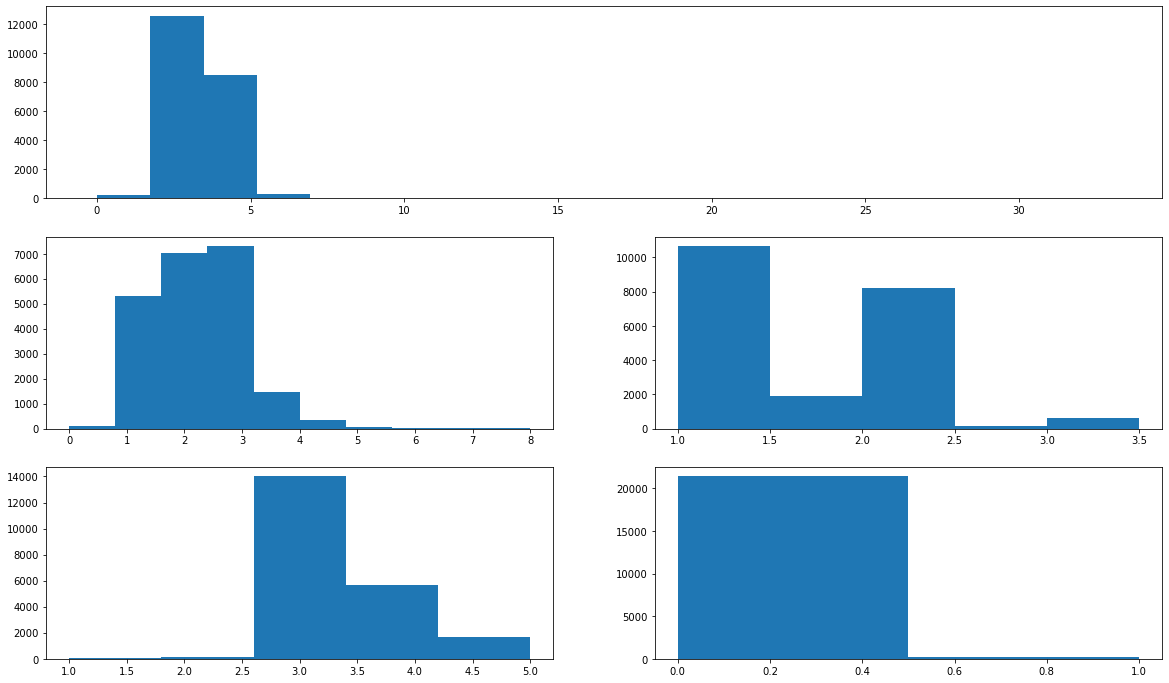

In [57]:
# grid layout to subplots
fig = plt.figure(figsize=(20,12))
specs = gridspec.GridSpec( nrows=3, ncols=2, figure=fig )

ax1 = fig.add_subplot( specs[0,:] )
ax2 = fig.add_subplot( specs[1,0] )
ax3 = fig.add_subplot( specs[1,1] )
ax4 = fig.add_subplot( specs[2,0] )
ax5 = fig.add_subplot( specs[2,1] )

# houses per bedrooms
ax1.hist( x='bedrooms', bins=19, data=num_attributes);

# houses per bathrooms
ax2.hist( x='bathrooms', bins=10, data=num_attributes );

# houses per floors
ax3.hist( x='floors', bins=5, data=num_attributes );

# houses per condition
ax4.hist( x='condition', bins=5, data=num_attributes );

# houses per waterview
ax5.hist( x='waterfront', bins=2, data=num_attributes );

## 1.5 Quartiles

In [53]:
# price quartile
quart = list(data['price'].quantile([0.25, 0.5, 0.75])) 
print( quart )

[321950.0, 450000.0, 645000.0]


# 2.0 Feature Engineering

## 2.1 Change Data Type

In [63]:
data['date'] = pd.to_datetime( data['date'] )

## 2.2 New Data Columns

In [76]:
data['year'] = pd.to_datetime( data['date'] ).dt.year
data['year_month'] = pd.to_datetime( data['date'] ).dt.strftime( '%Y-%m' )
data['year_week'] = pd.to_datetime( data['date'] ).dt.strftime( '%Y-%U' )
data['month'] = pd.to_datetime( data['date'] ).dt.month

## 2.3 Waterfront Categorical Column

In [77]:
data['is_waterfront'] = data['waterfront'].apply(  lambda x: 'no' if x == 0 else 'yes')

## 2.4 Price Level Column

In [80]:
quartile = list( data['price'].quantile([0.25, 0.50, 0.75]) )

data['price_level'] = data['price'].apply( lambda x: 'level_one'   if x<= quartile[0] else
                                                     'level_two'   if ( x > quartile[0] ) & ( x <= quartile[1] ) else
                                                     'level_three' if ( x > quartile[1] ) & ( x <= quartile[2] ) else
                                                     'level_four' )

## 2.5 Condition Status

In [89]:
data['status_condition'] = data['condition'].apply( lambda x: 'bad'     if x <= 2 else
                                                              'regular' if x == 3 else
                                                              'good'    if x == 4 else
                                                              'excelent')

## 2.6 Renovated Status

In [90]:
data['renovated'] = data['yr_renovated'].apply( lambda x: 'no' if x == 0 else 'yes' )

## 2.7 Price per Lot Size

In [91]:
data['price/sqft_lot'] = data['price']/data['sqft_lot']

# 3.0 Data Filtering

## 3.1 Check NA

In [92]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
year                0
year_month          0
year_week           0
month               0
is_waterfront       0
price_level         0
status_condition    0
renovated           0
price/sqft_lot      0
dtype: int64

## 3.2 Fillout NA

## 3.3 Data Filtering

In [93]:
# bedrooms
data = data[ data['bedrooms'] != 33 ]

## 3.4 Select Columns

In [94]:
# grade
data = data.drop( columns='grade')

# sqft_above
data = data.drop( columns='sqft_above')

# sqft_living15
data = data.drop( columns='sqft_living15')

# sqft_lot15
data = data.drop( columns='sqft_lot15' )

# 4.0 Data Exploratory Analysis

# 5.0 Data Transform